In [1]:
#Import modules 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math 

#### The hidden hierarchical nature of soft and particulate gels 


The modified fractional Kelvin-Voigt model described in this paper is described by the complex moduli: 

$$G^{*} = G_{0} (1+ (i \omega \tau) \frac{1}{1+(i \omega \tau_{l})^{1-\alpha}},$$

where $\tau=\eta/G_{0}$ is the relaxation time and $\tau_{l} = (\eta/V)^{1/1-\alpha}$ is the cut-off timescale that captures the transition from faster power-law relaxation modes to a slower single-relaxation terminal mode. 

Given that $G^{*} = G' + iG''$, we find that the storage and loss modulus are given by: 

$$G' = G_{0} + \frac{(G_{0} \omega \tau)( \omega \tau + \omega^{1-\alpha} \tau_{l}^{1-\alpha} (-1)^{-\alpha} + \omega^{-\alpha} \tau_{l}^{-\alpha} sin(\frac{-\alpha \pi}{2}))}{1-(\omega \tau_{l})^{2(1-\alpha)}},$$

$$G'' = \frac{(G_{0} \omega \tau) (1- \omega^{-\alpha} \tau_{l}^{- \alpha}cos(\frac{-\alpha \pi}{2}))}{1-(\omega \tau_{l})^{2(1-\alpha)}},$$

with $\tau = \frac{\eta}{G}$, $\tau_{l} = (\frac{\eta}{V})^(\frac{1}{1-\alpha})$, $G_{0} = \frac{\tilde{E}_{0}}{n^{2\alpha}}$, $\eta= n^{2-2\alpha} \tilde{\eta}_{0}$, $V= \tilde{E}_{0} (\frac{\tilde{\eta}_{0}}{\tilde{E}_{0}})^{\alpha}.$

https://www.nature.com/articles/s41567-023-01988-7#Sec17

In [27]:
def storage(w, E0, eta0, a, n): 
    V = E0 * ((eta0 / E0) ** a)
    eta = (n ** (2 - (2 * a))) * eta0
    G0 = E0 / (n ** (2 * a))
    tl = (eta / V) * (1 / (1 - a))
    t = eta / G0
    
    num = (G0 * w * t) * ((w * t) + ((w ** (1 - a)) * (tl ** (1 - a)) * ((-1) ** (-a))) + ((w ** (-a)) * (tl ** (-a)) * math.sin((-a * math.pi) / 2)))
    den = 1 - ((w * tl) ** (2 * (1 - a)))
    
    sln = G0 + (num / den)
    return sln

def loss(w, eta0, E0, t, a): 
    V = E0 * ((eta0 / E0) ** a)
    eta = (n ** (2 - (2 * a))) * eta0
    G0 = E0 / (n ** (2 * a))
    tl = (eta / V) * (1 / (1 - a))
    t = eta / G0
    
    num = (G0 * w * t) * (1 - ((w ** (-a)) * (tl ** (-a)) * math.cos((-a * math.pi) / 2)))
    den = 1 - ((w * tl) ** (2 * (1 - a)))
    
    sln = G0 + (num / den)
    return sln

#### Fractal ladder models and power law wave equations 
In fractal ladder models and power law wave equations (Kelly and McGough), a fractal ladder model is graphed with the assumption that all spring have the same stiffness $G$ and dashpots have the same viscosity $\eta$. As it is described in the notes, we begin with the transfer function $\hat{g}(s)$, from which we perform a binomial and low-frequency approximation to obtain a stress-strain relationship. A dynamic transformation results in the the complex moduli given by: 

$$G^{*} = \frac{\sigma_{0}^{*}}{\epsilon_{0}^{*}} = \frac{4}{3} \sqrt{\eta G_{0}}(i \omega)^{1/2},$$

which then gives the following loss and storage modulus, respectively: 

$$G' = \frac{4}{3} \frac{1}{\sqrt{2}} \sqrt{\eta G_{0} \omega}$$
$$G'' = \frac{4}{3} \frac{1}{\sqrt{2}} \sqrt{\eta G_{0} \omega}$$

If one were to replace the dashpot by a fractal ladder yields a stress-strain relationship: 

$$\sigma = \frac{4}{3} \eta^{\beta} E^{1- \beta} \frac{\partial^{\beta} \epsilon}{\partial t^{\beta}},$$

with $\beta = \frac{1}{2} (1- \frac{1}{2^{M}} + \frac{1}{2^{N}})$. 


Source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2771060/

In [28]:
def storage(w, eta, G0): 
    sln = (4/3) * (1 / math.sqrt(s)) * (math.sqrt(eta * G0 * w))
    return sln

def loss(w, eta, G0): 
    sln = (4/3) * (1 / math.sqrt(s)) * (math.sqrt(eta * G0 * w))
    return sln

#### Computing the linear viscoelastic properties of soft gels using an optimal windowed chirp protocol

We can compute the storage and loss modulus from this equation, given by: 

$$G'(\omega) = G_{0} (1- (\frac{\omega}{\omega_{n}})^{2} + (\frac{\omega}{\omega_{n}})^{\alpha} \xi cos(\alpha \frac{\pi}{2}),$$

$$G''(\omega) = G_{0} ((\frac{\omega}{\omega_{n}})^{\alpha} \xi sin(\alpha \frac{\pi}{2}),$$

with the natural frequency of the mass-spring elements $\omega_{n} = \sqrt{G_{0}/M}$ and the dimensionless damping ratio that describes the overall power-law dissipative behaviour in the system $\xi = V / \sqrt{M^{\alpha} G_{0}^{2-\alpha}}$. 

chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://arxiv.org/pdf/1805.07987

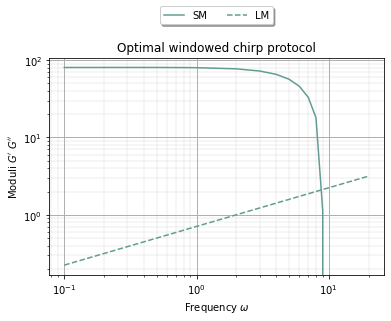

In [21]:
w=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20] 
SM=[]
LM=[]

#variables 
G0=80 #stiffness 
M=1 #mass 
alpha=0.5
V=1 

def DEFwn(G0, M): 
    return (math.sqrt(G0/M))

def DEFxi(V, M, G0): 
    return (V/(math.sqrt((M**(alpha))*(G0**(2-alpha)))))

for i in w: #frequency is w 
    SM.append(G0*(1 - ((i/ DEFwn(G0,M))**2) + ((i/ DEFwn(G0,M))**alpha)*DEFxi(V, M, G0)*math.cos(alpha*math.pi*0.5)))
    LM.append(G0*((i/ DEFwn(G0,M))**alpha)*DEFxi(V, M, G0)*math.sin(alpha*math.pi*0.5))
    
#Plot SM and LM 

fig, ax = plt.subplots()

ax.plot(w, SM, '-', label='SM', color='#629B92') 
ax.plot(w, LM, '--', label='LM', color='#629B92')


#Grid line
ax.grid(which = "major", linewidth = 1)
ax.grid(which = "minor", linewidth = 0.2)
ax.minorticks_on()

ax.set_xscale('log') #Set to log scale 
ax.set_yscale('log') #Set to log scale 

#Labels
plt.xlabel("Frequency $\omega $") 
plt.ylabel("Moduli $G'$ $G''$") 

#Legend
ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1.13), ncol=3, fancybox=True, shadow=True)


plt.title('Optimal windowed chirp protocol')

plt.show()

#### Hierarchical analogues to fractional relaxation equations 

Finite mechanical ladder arrangement 


$$\sigma = \eta_{0}^{\alpha} E^{1-\alpha} \frac{d^{\alpha}\epsilon}{dt^{\alpha}}$$

$$G' = \eta_{0}^{\alpha} E_{0}^{1-\alpha} (\omega \tau)^{\alpha} cos(\frac{\pi \alpha}{2})$$

$$G'' = \eta_{0}^{\alpha} E_{0}^{1-\alpha} (\omega \tau) sin(\frac{\pi \alpha}{2})$$


In [29]:
def storage(w, eta0, E0, t, alpha): 
    G= (eta0**alpha) * (E0** (1-alpha)) * ((w * t)** alpha)  * math.cos((math.pi * alpha)/2)
    return G 

def loss(w, eta0, E0, t, alpha): 
    G= (eta0**alpha) * (E0** (1-alpha)) * (w * t) * math.sin((math.pi * alpha)/2)
    return G